<h2>Compare Lexington Property Taxes with Peers</h2>

Before and after residential exemption



In [57]:
%autosave 30

Autosaving every 30 seconds


In [111]:
import pandas as pd
print pd.__version__


# Waltham: resexempt needs to be added
# 12.61 plus resexempt

#Andover
#Reading
#North Reading
#Westwood
#Concord
#Acton
#Westford
#Chelmsford

#urban alternatives
# Brookline
# Boston
# Somerville
# Cambridge


# lexington scenarios:

res_value = 9952138700
res_exempt_parcels = 9265
avg_res_parcel = 918772
orig_rate = 14.3

adjustments = {}
nonoo = {}
for resexempt in [0.1, 0.15, 0.2, 0.3]:
    ex_amt = avg_res_parcel*resexempt
    new_tax_rate = round(orig_rate * res_value / (res_value - ex_amt * res_exempt_parcels),2)
    print resexempt, new_tax_rate
    adjustments[resexempt] = [new_tax_rate,ex_amt]
    nonoo[resexempt] = [new_tax_rate, 0]
    
    

adjdf = pd.DataFrame.from_dict(adjustments, orient='index', columns=['NewRate','ExemptionAmount'])
print adjdf.info()

# tax bills
# https://dlsgateway.dor.state.ma.us/reports/rdPage.aspx?rdReport=AverageSingleTaxBill.SingleFamTaxBill_Main
# FY2018.
# may need to update for FY19; need to figure out which data we are showing

# population 2017 per google
taxrates = {'Lexington': [14.3,0,33727,14169,990805],
           'Andover':[15.27,0,35937,9591,613261],
           'Arlington':[12.13,0,45510,6113,655985],
           'Bedford':[13.74,0,14197,9265,674276],
           'Belmont':[12.15,0,26458,12196,1003750],
           'Burlington':[10.62,0,27176,5071,477504],
            'Concord':[14.19,0,19237,14494,1014269],
           'Lincoln':[14.03,0,6781,15629,1149169],
           'Needham': [11.88,0,30999,10749,904828],
           'Newton':[10.82,0,88994,11830,1093367],
           'Wellesley':[11.95,0,29479,14839,1241758],
           'Winchester': [11.02,0,22838,12590,1032847],
           'Woburn':[9.89,0,39701,4322,437002],
           'Lexington (10% RE)': adjustments[0.1]+[0,0],
           'Lexington (20% RE)' : adjustments[0.2]+[0,0],
           'Lexington (15% RE)' : adjustments[0.15]+[0,0],
           'Lexington (30% RE)' : adjustments[0.3]+[0,0], # adding in placeholder for demographics at end
           'Lexington Nonoo (10% RE)' : nonoo[0.1]+[0,0],
           'Lexington Nonoo (20% RE)' : nonoo[0.2]+[0,0],
           'Lexington Nonoo (30% RE)' : nonoo[0.3]+[0,0]
           }

tdf = pd.DataFrame.from_dict(taxrates, orient='index', columns=['ResRate','ResExemption',
                                                            'Population', 'AvgSingleFamilyTax','AvgSingleFamilyValue'])
print tdf.info()



0.23.4
0.1 15.64
0.15 16.4
0.2 17.25
0.3 19.24
<class 'pandas.core.frame.DataFrame'>
Float64Index: 4 entries, 0.3 to 0.1
Data columns (total 2 columns):
NewRate            4 non-null float64
ExemptionAmount    4 non-null float64
dtypes: float64(2)
memory usage: 96.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Bedford to Wellesley
Data columns (total 5 columns):
ResRate                 20 non-null float64
ResExemption            20 non-null float64
Population              20 non-null int64
AvgSingleFamilyTax      20 non-null int64
AvgSingleFamilyValue    13 non-null float64
dtypes: float64(3), int64(2)
memory usage: 960.0+ bytes
None


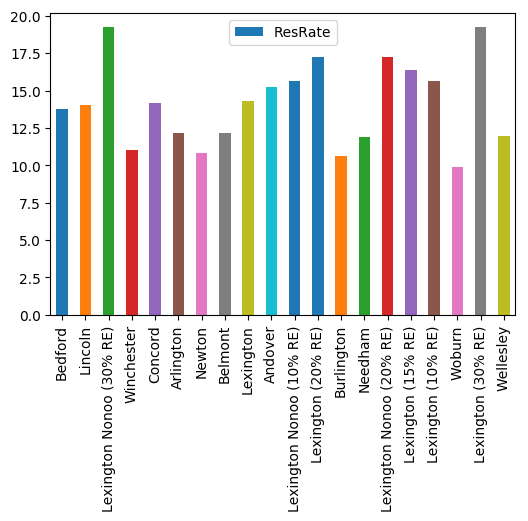

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

tdf.plot.bar(y='ResRate')


In [113]:
# build data sets
town_examples = {}
for idx, row in tdf.iterrows():
    town = idx
    town_res_rate = row['ResRate']
    town_res_exempt = row['ResExemption']
    values = []
    for i in range(600000,2200000,200000):
        values.append(int(town_res_rate * (i-town_res_exempt) / 1000))
    town_examples[town] = values

# string assessment levels pre-formatted
assessment_levels = []
assessment_strings = []
for i in range(600000,2200000,200000):
    assessment_levels.append(i)
    cat_str = '$'
    if i >= 1000000:
        cat_str += str(i / 1000000)[:1] + ','
        i = i % 1000000
    
    thousands = i / 1000
    cat_str += str(thousands).zfill(3) + ','
    units  = i % 1000  # probably 0
    cat_str += str(units).zfill(3)
    assessment_strings.append(cat_str)
    
#print assessment_levels
#print 'formatted assessment levels'
#print assessment_strings

print 
print 'town data'
print town_examples
    
    


town data
{'Bedford': [8244, 10992, 13740, 16488, 19236, 21984, 24732, 27480], 'Lincoln': [8418, 11224, 14030, 16836, 19642, 22448, 25254, 28060], 'Woburn': [5934, 7912, 9890, 11868, 13846, 15824, 17802, 19780], 'Winchester': [6612, 8816, 11020, 13224, 15428, 17632, 19836, 22040], 'Concord': [8514, 11352, 14190, 17028, 19866, 22704, 25542, 28380], 'Arlington': [7278, 9704, 12130, 14556, 16982, 19408, 21834, 24260], 'Newton': [6492, 8656, 10820, 12984, 15148, 17312, 19476, 21640], 'Belmont': [7290, 9720, 12150, 14580, 17010, 19440, 21870, 24300], 'Lexington': [8580, 11440, 14300, 17160, 20020, 22880, 25740, 28600], 'Andover': [9162, 12216, 15270, 18324, 21378, 24432, 27486, 30540], 'Lexington Nonoo (10% RE)': [9384, 12512, 15640, 18768, 21896, 25024, 28152, 31280], 'Lexington (20% RE)': [7180, 10630, 14080, 17530, 20980, 24430, 27880, 31330], 'Burlington': [6371, 8496, 10620, 12743, 14867, 16992, 19116, 21240], 'Needham': [7128, 9504, 11880, 14256, 16632, 19008, 21384, 23760], 'Lexingt

                             Newton  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   541000.0   715000.0
Avg Single Family Tax      591500.0   708450.0
Avg Single Family Assess  1093367.0   990805.0
Population                 889940.0   337270.0

saving
showing


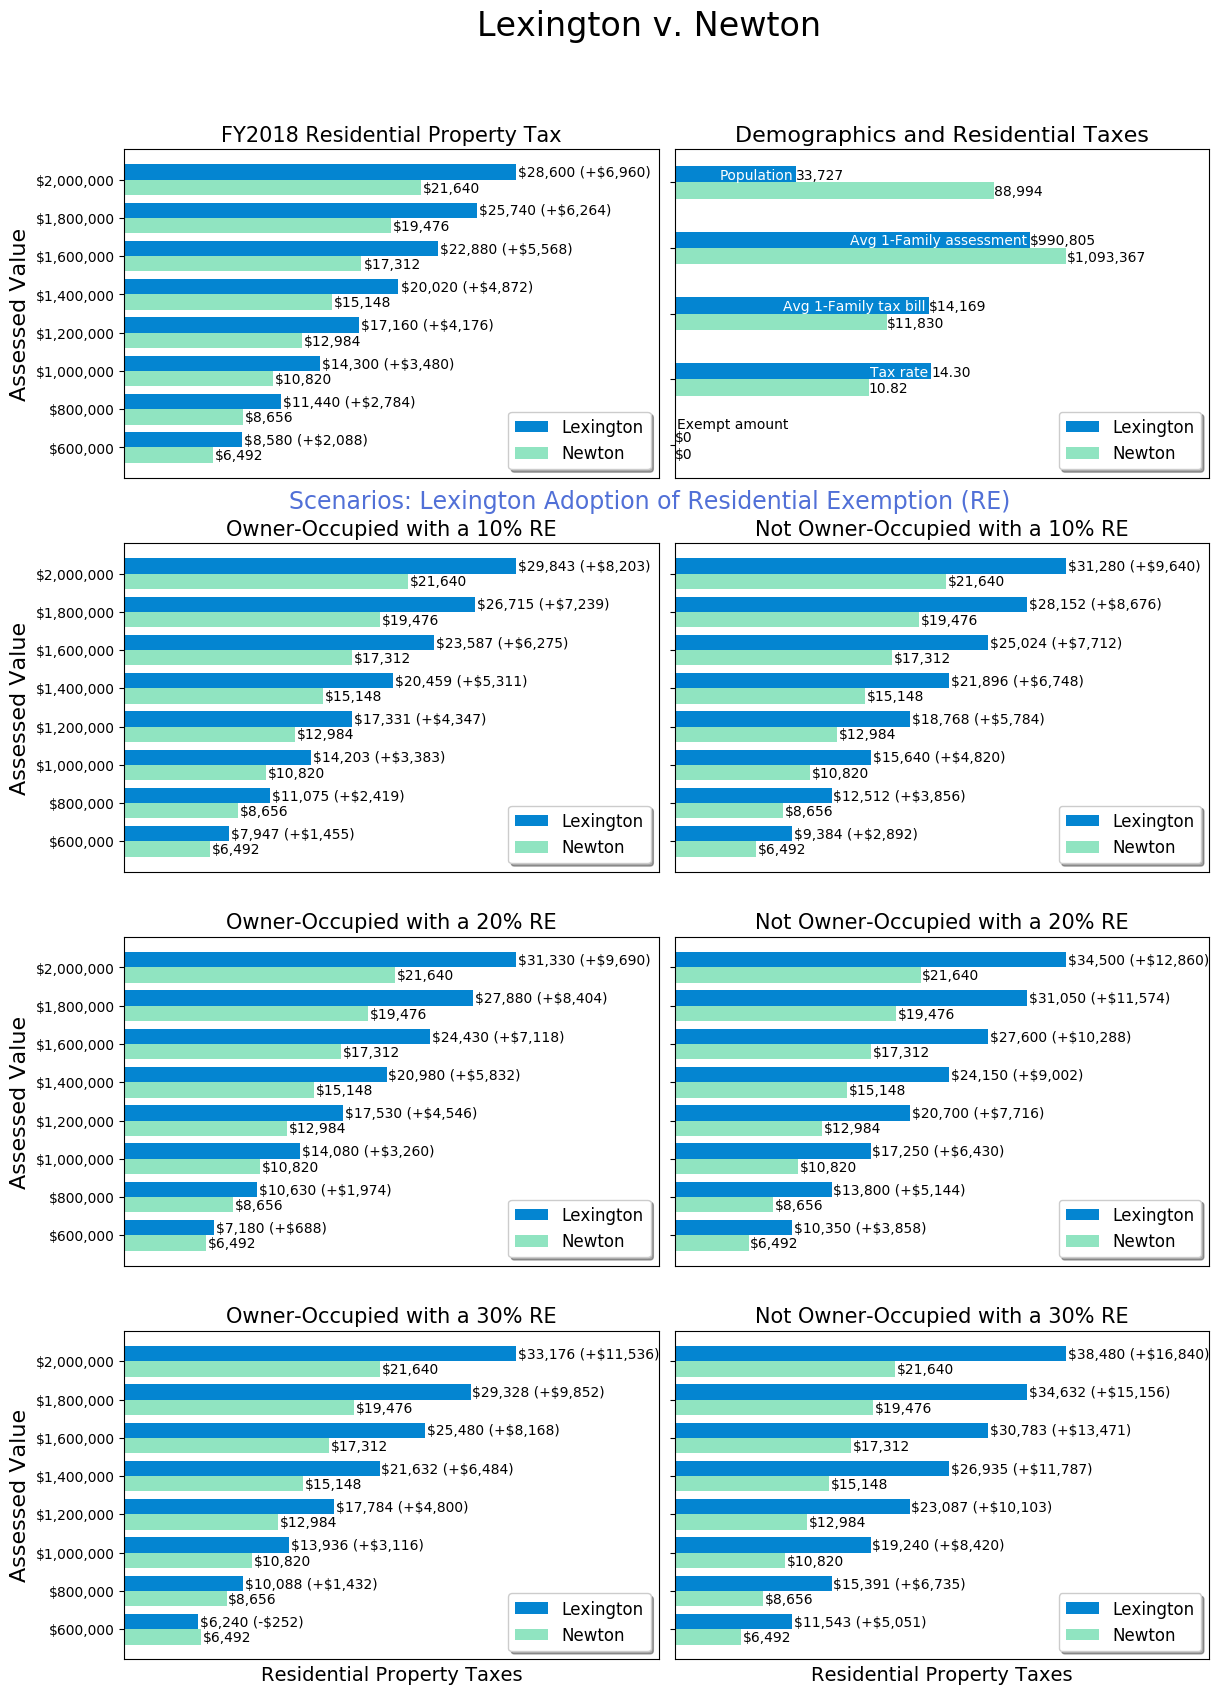

                            Belmont  Lexington
Exempt Amount                   0.0        0.0
Tax Rate                   607500.0   715000.0
Avg Single Family Tax      609800.0   708450.0
Avg Single Family Assess  1003750.0   990805.0
Population                 264580.0   337270.0

saving
showing


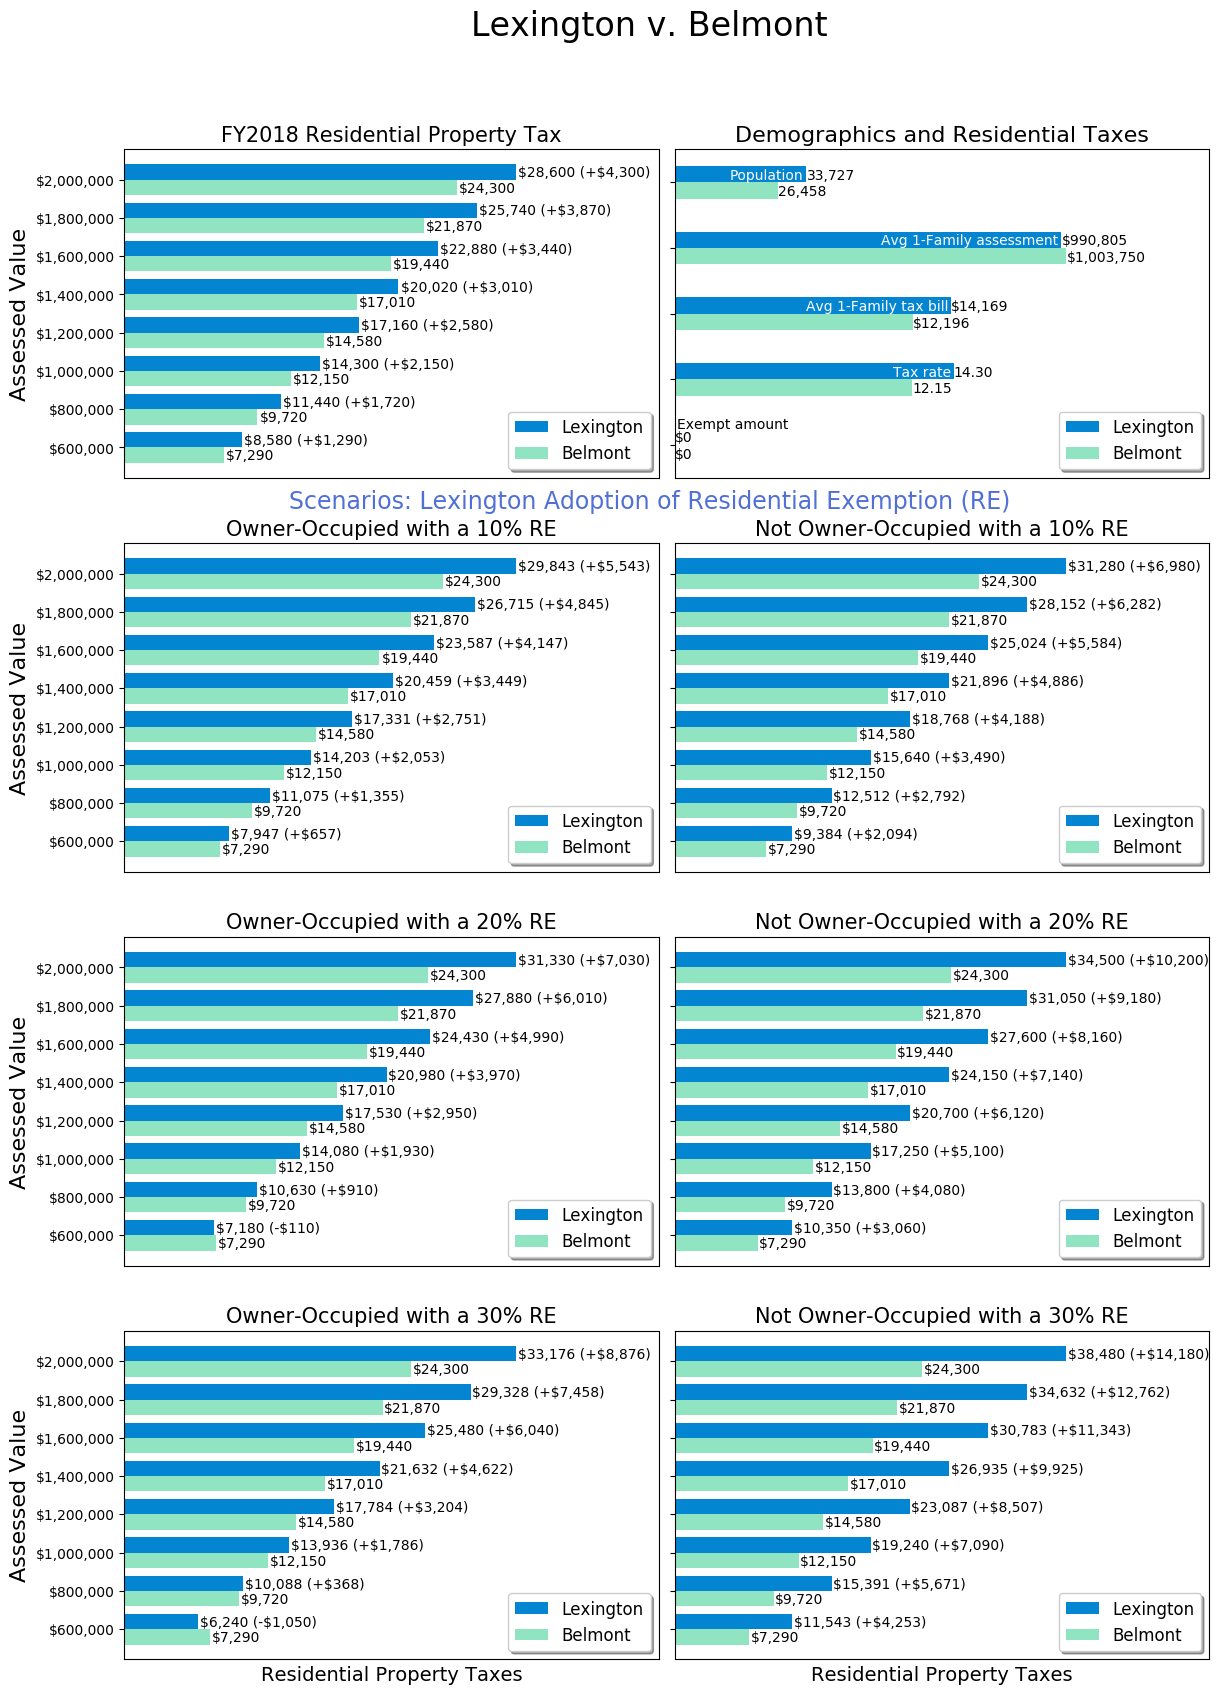

In [202]:
# compare Lexington with all other towns
from matplotlib.ticker import FuncFormatter
import numpy as np
def subcategorybar(ax, X, Xlabels, vals, width=0.8, colors=[], labels=[]):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        ax.barh(_X - width/2. + i/float(n)*width, vals[i], 
                height=width/float(n), color=colors[i], align="edge", label=labels[i])  
        
        
def thousands(x, pos):
    'The two args are the value and tick position'
    #print 'formatter:',x, pos
    return '$%6.0fK' % (int(x)/1000.0)
k_formatter = FuncFormatter(thousands)


def format_thousands_currency(label_val, add_plus=False, currency=True):
    '''
    add_plus will cause a plus for positive numbers in front
    '''
    build_str = ''
    if label_val < 0:
        build_str += '-'
        label_val *= -1
    elif add_plus:
        build_str += '+'

    if currency:
        build_str += '\$'
    label_val = int(label_val)
    orig_label_val = label_val
    zf=0
    if label_val >= 1000000:
        build_str += str(label_val / 1000000) + ','
        label_val = label_val % 1000000
        zf=3
    if label_val >= 1000:
        build_str += str(label_val / 1000).zfill(zf) + ','
        label_val = label_val % 1000
        zf=3
    build_str += str(label_val).zfill(zf)
    #print orig_label_val,':', build_str
    return build_str
    

# first color is comparison town
# second is Lexington
colors = ['xkcd:light teal', 'xkcd:cerulean', 'xkcd:red']


barheight = 0.8
for i in town_examples:
    if not i.startswith('Lexington'):
        if i not in ['Newton','Belmont']:
            continue
        
            
        # Base plot
        
        f, axarr = plt.subplots(4, 2)
        f.set_size_inches(14,20)
        # 
        # overall plot 
        plt.suptitle('%s v. %s' % ('Lexington', i), y=0.95, fontsize=24)
        plt.figtext(0.5, 0.71, 'Scenarios: Lexington Adoption of Residential Exemption (RE)', 
                 transform=ax.transAxes, fontsize=17, color = 'xkcd:cornflower blue', ha='center', va='top')   
    
        for comparison, sub_title, row, col in \
            [('Lexington', 'FY2018 Residential Property Tax', 0, 0), 
             ('Lexington (10% RE)', 'Owner-Occupied with a 10% RE', 1,0), 
             ('Lexington (20% RE)', 'Owner-Occupied with a 20% RE', 2,0), 
             ('Lexington (30% RE)', 'Owner-Occupied with a 30% RE', 3,0), 
             ('Lexington Nonoo (10% RE)', 'Not Owner-Occupied with a 10% RE', 1,1),
             ('Lexington Nonoo (20% RE)', 'Not Owner-Occupied with a 20% RE', 2,1),
             ('Lexington Nonoo (30% RE)', 'Not Owner-Occupied with a 30% RE', 3,1)]:

            #print 'Drawing r %d c %d' % (row,col)
            ax= axarr[row, col]

            
            pre_labels = ax.get_yticklabels()
            subcategorybar(ax,assessment_levels, assessment_strings,
                           [town_examples[i], town_examples[comparison]], colors=colors, labels=[i, 'Lexington'])
            pre_labels = ax.get_yticklabels()
        
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(reversed(handles), reversed(labels), loc='lower right', fontsize='large',
                     fancybox=True, shadow=True)  # reverse both handles and labels        
            
            ax.set_title(sub_title, fontsize=15)
            if col==0:
                ax.set_ylabel('Assessed Value', fontsize=16)
            if row==3:
                ax.set_xlabel('Residential Property Taxes', fontsize=14)
            
            # enlrage x axis 20% to accomodate annotations of bars
            ax.set_xlim((0, ax.get_xlim()[1]*1.30))
            
            compare_values = {}
            for patch in ax.patches:
                label = format_thousands_currency(patch.get_width())
                yval = patch.get_y()
                if int(yval) != yval:
                    adj_val = yval + 0.4
                    compare_values[adj_val] = patch.get_width()
                else:
                    #print 'retrieving value', compare_values[yval]
                    label += ' (' + format_thousands_currency(patch.get_width() - compare_values[yval], add_plus=True) + ')'
                ax.text(patch.get_x() + patch.get_width() + 150, 
                        patch.get_y(), 
                        label,
                        ha='left', 
                        va='bottom')

        # demographic comparison
        #
        # we will need y axis labels for demographics so it has to go on left side -> lower left
        ax = axarr[0,1]
        tempdf = tdf.loc[[i, 'Lexington'],['ResExemption', 'ResRate', 'AvgSingleFamilyTax', 'AvgSingleFamilyValue', 'Population']
                         ]
        
        resrate_mult = 50000.0
        tempdf.ResRate *= resrate_mult
        pop_mult = 10.0
        tempdf.Population *= pop_mult
        tax_mult = 50.0
        tempdf.AvgSingleFamilyTax *= tax_mult
        tempdf.rename(columns={'ResRate':'Tax Rate', 
                               'ResExemption':'Exempt Amount',
                               'AvgSingleFamilyValue':'Avg Single Family Assess',
                               'AvgSingleFamilyTax': 'Avg Single Family Tax'
                              },
                     inplace=True)
        tempdf = tempdf.transpose()
        
        print tempdf
        tempdf.plot.barh(y=[i, 'Lexington'], ax=ax, legend=True, color=colors) 
#        ax.legend(labels=[i,'Lexington'],loc='lower right', fontsize='large', fancybox=True, shadow=True)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(labels), loc='lower right', fontsize='large',
                     fancybox=True, shadow=True)  # reverse both handles and labels        
        labels = {
            0:'Exempt amount',
            1:'Tax rate',
            2:'Avg 1-Family tax bill',
            3:'Avg 1-Family assessment',
            4:'Population'
        }
        
        ax.set_xlim((0, ax.get_xlim()[1]*1.30))
        for cntr, patch in enumerate(ax.patches):
            patch_type = cntr % 5
            if patch_type in [0,3]:  # exempt amount, avg single family tax, avg single family assess
                label = format_thousands_currency(patch.get_width())
            elif patch_type == 2:
                label = format_thousands_currency(patch.get_width() / tax_mult)
            elif patch_type == 1:
                label = '%1.2f' % (patch.get_width()/resrate_mult)
                #print 'residential tax rate label %s' % label
            else:
                label = format_thousands_currency(int(patch.get_width() / pop_mult), add_plus=False, currency=False)
            #print '%d annotation with label %s' % (cntr, label)
            ax.text(patch.get_x() + patch.get_width() + 150, 
                        patch.get_y(),
                        label, 
                        ha='left', 
                        va='bottom')   
            if cntr > 4:
                if (cntr%5) == 0:
                    ax.text(patch.get_x() + patch.get_width()+5000, 
                                patch.get_y()+0.2,
                                labels[cntr%5], 
                                color = 'xkcd:black',
                                ha='left', va='bottom')
                else:
                    ax.text(patch.get_x() + patch.get_width()-8000, 
                                patch.get_y(), #+0.2,
                                labels[cntr%5], 
                                color = 'xkcd:white',
                                ha='right', 
                                va='bottom')   
                
        ax.set_title('Demographics and Residential Taxes', fontsize=16)

        
        # Average single family tax bill  
        # 
        # just two color bars - one per town so this can go in lower right
        if 1==0:
            ax = axarr[2,1]
            tdf.loc[[i, 'Lexington']].plot.barh(y='AvgSingleFamilyTax',ax=ax, color=colors, legend=False)        
            ax.set_xlim((0, ax.get_xlim()[1]*1.30))
            for patch in ax.patches:
                label = format_thousands_currency(int(patch.get_width()))
                #print 'annotation with label %s' % label
                ax.text(patch.get_x() + patch.get_width() + 150, 
                            patch.get_y()+.1,
                            label, 
                            ha='left', 
                            va='bottom')        
            ax.set_title('Average Single Family Tax Bill (FY2018)', fontsize=16)
           # ax.legend(labels=[i,'Lexington'],loc='lower right', fontsize='large', fancybox=True, shadow=True)
 
                

        
        # no x tick labels
        plt.setp([a.xaxis.set_major_locator(plt.NullLocator()) for a in axarr.flatten()])
                  
        # must set yticks and yticklabels
        plt.setp([a.set_yticks(np.arange(len(assessment_strings))) for a in axarr[:,0]], visible=True)
        plt.setp([a.set_yticklabels(assessment_strings) for a in axarr[:,0]], visible=True)
        # y tick labels only for rows
        
        plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
        
        plt.subplots_adjust(wspace=0.03)
        print 'saving'
        f.savefig('prop_tax_compare_%s.png' % i)
        print 'showing'
        plt.show()
        

        
# need three bars - also non owner occupied property in lexington
# relative to base community!
# that's going to be a lot higher
#

2.2.3


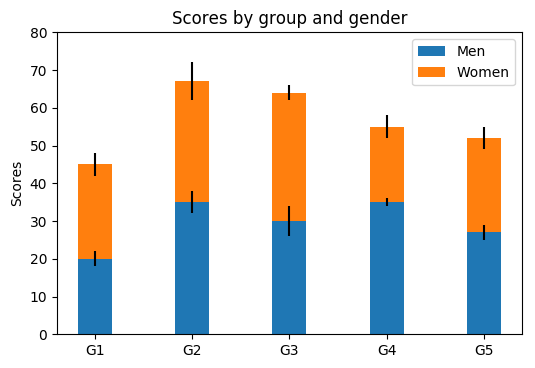

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print matplotlib.__version__


N = 5
menMeans = [20, 35, 30, 35, 27]
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

<h2>Code Samples Below</h2>

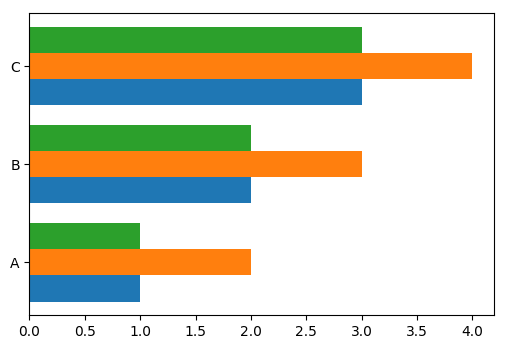

In [64]:
# example code: https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
# tweaked for horizontal bar charts
import numpy as np
import matplotlib.pyplot as plt

X = ['A','B','C']
Y = [1,2,3]
Z = [2,3,4]

def subcategorybar(ax, X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        pre_labels = ax.get_yticklabels()

#        print 'Pre: Length of labels', len(pre_labels)
#        for cntr, k in enumerate(pre_labels):
#            print cntr, k.get_text()
#        print 'about to plot vals with length %d' % len(vals[i])
#        print vals[i]
        ax.barh(_X - width/2. + i/float(n)*width, vals[i], 
                height=width/float(n), align="edge")   
#        pre_labels = ax.get_yticklabels()
#        print 'Post: Length of labels', len(pre_labels)
#        for cntr, k in enumerate(pre_labels):
#            print cntr, k.get_text()

#    print _X
#    print X
    ax.set_yticks(_X)
    ax.set_yticklabels(X)
#    plt.yticks(_X, X)

ax = plt.gca()
subcategorybar(ax, X, [Y,Z,Y])

plt.show()

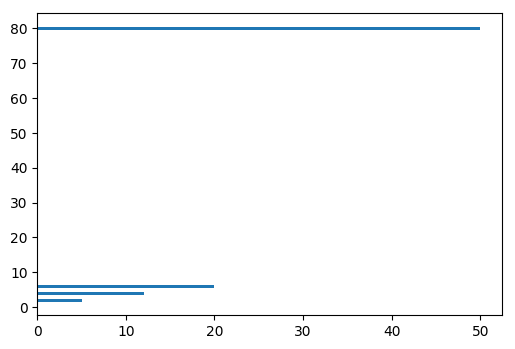

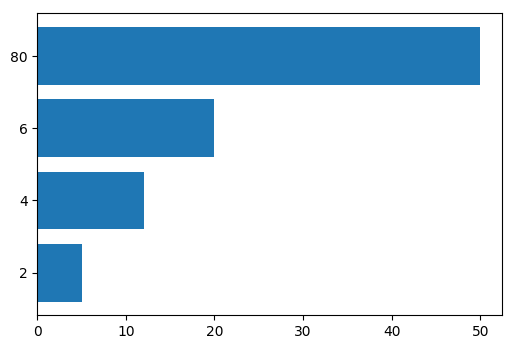

In [65]:
a=[2,4,6,80]
b=[5,12,20,50]

plt.barh(a,b)
plt.show()

# lesson:
# must set axis to string to have matplotlib not try to proportionally space
# as in a categorical variable

a=['2','4','6','80']
b=[5,12,20,50]

plt.barh(a,b)
plt.show()

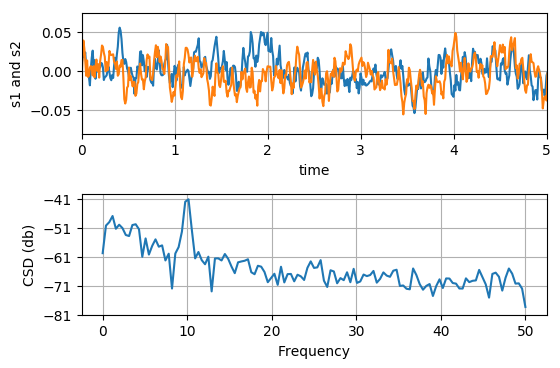

In [283]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (db)')
plt.show()